![ewatercycle logo](https://raw.githubusercontent.com/eWaterCycle/ewatercycle/main/docs/examples/logo.png)

# PCRGlobWB example use case

This example shows how the [PCRGlobWB model](https://globalhydrology.nl/research/models/pcr-globwb-2-0/) can be used within the eWaterCycle system. It is based on the example use case from https://github.com/UU-Hydro/PCR-GLOBWB_input_example.

This example use case assumes that the ewatercycle platform has been installed and configured on your system. See our [system setup documentation](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) for instructions if this is not the case.

In [1]:
# This cell is only used to suppress some distracting output messages
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
from rich import print

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

ERROR 1: PROJ: proj_create_from_database: Open of /home/bart/micromamba/envs/ewatercycle/share/proj failed
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


## Loading a parameter set

A set of (example) parameter sets come pre-installed on the eWaterCycle system (see [system setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) if this is not the case).

In [3]:
sets = ewatercycle.parameter_sets.available_parameter_sets()
sets.keys()

dict_keys(['pcrglobwb_rhinemeuse_30min', 'wflow_rhine_sbm_nc'])

Existing parametersets can easily be loaded:

In [4]:
parameter_set = sets["pcrglobwb_rhinemeuse_30min"]
print(parameter_set)

ParameterSet(
    name='pcrglobwb_rhinemeuse_30min',
    directory=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min'),
    config=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min/ini_and_batch_files/deltares
_laptop/setup_natural_test.ini'),
    doi='https://doi.org/10.5281/zenodo.1045339',
    target_model='pcrglobwb',
    supported_model_versions={'setters'},
    downloader=GitHubDownloader(
        org='UU-Hydro',
        repo='PCR-GLOBWB_input_example',
        branch='master',
        subfolder='RhineMeuse30min'
    )
)

It is also possible to load a custom parameterset by passing in the relevant parameters directly:

```py
custom_parameter_set = ewatercycle.parameter_sets.ParameterSet(
    name="custom_parameter_set",
    directory="/path-to-params/pcrglobwb_rhinemeuse_30min",
    config="/path-to-params/pcrglobwb_rhinemeuse_30min/setup_natural_test.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)
```

## Load forcing data

For this example case, the forcing is already included in the parameter set and configured correctly. Therefore in principle this step can be skipped. However, for the purpose of illustration, we show how the forcing would be loaded using the `ewatercycle.forcing` module, as if it came from another source. To learn about forcing generation, see our [preprocessing examples](https://ewatercycle.readthedocs.io/en/latest/examples/generate_forcing.html).

In [5]:
forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"](
    start_time="2001-01-01T00:00:00Z",
    end_time="2010-12-31T00:00:00Z",
    directory=parameter_set.directory / "forcing",
    shape=None,  # if available, it can be used e.g. for plotting
    precipitationNC="precipitation_2001to2010.nc",
    temperatureNC="temperature_2001to2010.nc",
)
print(forcing)

PCRGlobWBForcing(
    start_time='2001-01-01T00:00:00Z',
    end_time='2010-12-31T00:00:00Z',
    directory=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min/forcing'),
    shape=None,
    precipitationNC='precipitation_2001to2010.nc',
    temperatureNC='temperature_2001to2010.nc'
)

## Setting up the model

Note that the model version and the parameterset versions should be compatible.

In [6]:
pcrglob = ewatercycle.models.PCRGlobWB(
    parameter_set=parameter_set,
    forcing=forcing
)
print(pcrglob)

PCRGlobWB(
    parameter_set=ParameterSet(
        name='pcrglobwb_rhinemeuse_30min',
        directory=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min'),
        config=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min/ini_and_batch_files/delt
ares_laptop/setup_natural_test.ini'),
        doi='https://doi.org/10.5281/zenodo.1045339',
        target_model='pcrglobwb',
        supported_model_versions={'setters'},
        downloader=GitHubDownloader(
            org='UU-Hydro',
            repo='PCR-GLOBWB_input_example',
            branch='master',
            subfolder='RhineMeuse30min'
        )
    ),
    forcing=PCRGlobWBForcing(
        start_time='2001-01-01T00:00:00Z',
        end_time='2010-12-31T00:00:00Z',
        directory=PosixPath('/home/bart/ewatercycle/parameter-sets/pcrglobwb_rhinemeuse_30min/forcing'),
        shape=None,
        precipitationNC='precipitation_2001to2010.nc',
        temperatureNC='temperature_2001to2010.nc'
    )
)

In [7]:
pcrglob.version

'setters'

eWaterCycle exposes a selected set of configurable parameters. These can be modified in the `setup()` method.

In [8]:
print(pcrglob.parameters)

dict_items([('start_time', '2001-01-01T00:00:00Z'), ('end_time', '2001-01-01T00:00:00Z'), ('routing_method', 
'accuTravelTime'), ('max_spinups_in_years', '2')])

Calling `setup()` will start up a container. Be careful with calling it multiple times!

In [9]:
cfg_file, cfg_dir = pcrglob.setup(
    end_time="2001-02-28T00:00:00Z",
    max_spinups_in_years=5
)
cfg_file, cfg_dir

('/home/bart/ewatercycle/output/pcrglobwb_20231207_131418/pcrglobwb_ewatercycle.ini',
 '/home/bart/ewatercycle/output/pcrglobwb_20231207_131418')

In [10]:
pcrglob.parameters

dict_items([('start_time', '2001-01-01T00:00:00Z'), ('end_time', '2001-02-28T00:00:00Z'), ('routing_method', 'accuTravelTime'), ('max_spinups_in_years', '5')])

Note that the parameters have been changed. A new config file which incorporates these updated parameters has been generated as well. If you want to see or modify any additional model settings, you can acces this file directly. When you're ready, pass the path to the config file to `initialize()`.

In [11]:
pcrglob.initialize(cfg_file)

## Running the model

Simply running the model from start to end is straightforward. At each time step we can retrieve information from the model.

In [12]:
while pcrglob.time < pcrglob.end_time:
    pcrglob.update()

## Interacting with the model

PCRGlobWB exposes many variables. Just a few of them are shown here:

In [13]:
list(pcrglob.output_var_names)[-15:-5]

['total_abstraction',
 'livestockWaterWithdrawalVolume',
 'desalination_source_abstraction',
 'discharge',
 'temperature',
 'upper_soil_transpiration',
 'snow_water_equivalent',
 'total_runoff',
 'transpiration_from_irrigation',
 'fraction_of_surface_water']

Model fields can be fetched as xarray objects (or as flat numpy arrays using `get_value()`):

In [14]:
da = pcrglob.get_value_as_xarray("discharge")
da.thin(5)  # only show every 5th value in each dim

<xarray.DataArray (longitude: 3, latitude: 4)>
array([[         nan,          nan,          nan,          nan],
       [         nan,  74.54767609,  10.38944435,          nan],
       [         nan, 195.36053467,          nan,          nan]])
Coordinates:
  * latitude   (latitude) float64 3.75 6.25 8.75 11.25
  * longitude  (longitude) float64 46.25 48.75 51.25

Xarray makes it very easy to plot the data. In the figure below, we add three points that we will use to illustrate that we can also access individual grid cells.

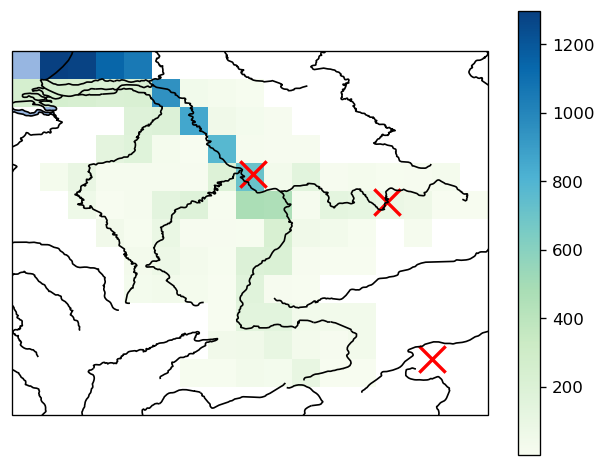

In [15]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection=crs.PlateCarree())
da.plot(ax=ax, cmap="GnBu")

# Overlay ocean and coastines
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, color="k")
ax.coastlines()

# Add some verification points
target_longitudes = [7.8, 10.2, 11]
target_latitudes = [50.3, 49.8, 47]
ax.scatter(target_longitudes, target_latitudes, s=250, c="r", marker="x", lw=2)

We can get (or set) the values at custom points as well:

In [16]:
pcrglob.get_value_at_coords("discharge", lon=target_longitudes, lat=target_latitudes)

array([713.29223633,  84.76369476,          nan])

## Cleaning up

Models usually perform some "wrap up tasks" at the end of a model run, such as writing the last outputs to disk and releasing memory. In the case of eWaterCycle, another important teardown task is destroying the container in which the model was running. This can free up a lot of resources on your system. Therefore it is good practice to always call `finalize()` when you're done with an experiment.

In [17]:
pcrglob.finalize()